# Edge detection using difference of Gaussian

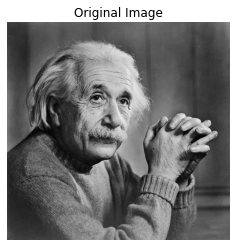

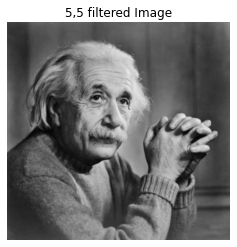

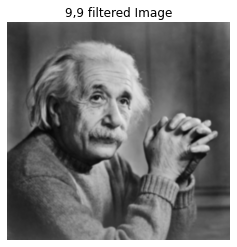

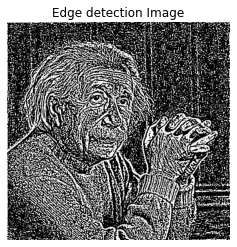

In [16]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('media/einstein.jpg')
g1 = cv2.GaussianBlur(img,(5,5),0)
g2 = cv2.GaussianBlur(img,(9,9),0)

plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img)
plt.figure(),plt.axis("off"),plt.title("5,5 filtered Image"),plt.imshow(g1)
plt.figure(),plt.axis("off"),plt.title("9,9 filtered Image"),plt.imshow(g2)
plt.figure(),plt.axis("off"),plt.title("Edge detection Image"),plt.imshow((g2-g1))

plt.show()

# Template matching using Histograms

In [1]:
import cv2

img = cv2.imread('TanukuSatyaTeja_EE20B137/barrel.png')
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([img_1],[1,2],None,[256,256],[0,256,0,256])
cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

path = 'TanukuSatyaTeja_EE20B137/Speed_Record.mp4'
video = cv2.VideoCapture(path)
ret, frame = video.read()
if not (ret):
    print("Can't receive frame")
    exit()
frame_1 = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

res = cv2.calcBackProject([frame_1], [1, 2],hist, [0, 256, 0, 256], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res) 
ret,thr_1 = cv2.threshold(res,127,255,cv2.THRESH_BINARY)
ret,thr_2 = cv2.threshold(res,127,255,cv2.THRESH_TRUNC)
ret,thr_3 = cv2.threshold(res,127,255,cv2.THRESH_TOZERO)
final = cv2.merge((thr_1,thr_2,thr_3))
result = cv2.bitwise_or(final,frame)

cv2.imshow("Back Projection", result)
if cv2.waitKey(25) == ord('q'):
    exit()